In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.nlp import *

In [2]:
df_bg_tmp = pd.read_csv('../datasets/games-cleaned.csv')
df_bg = df_bg_tmp.copy()

In [3]:
bg_nlp = df_bg[['name', 'description']].copy()
bg_nlp = setup(bg_nlp, target = 'description', custom_stopwords = ['player', 'card', 'play', 'game'], session_id=42)

Description,Value
session_id,42
Documents,4609
Vocab Size,17167
Custom Stopwords,True


In [4]:
lda = create_model('lda', num_topics = 6, multi_core = True)
lda_results = assign_model(lda)
lda_results.head()

,name,description,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Dominant_Topic,Perc_Dominant_Topic
0,Pandemic,pandemic several virulent disease break simult...,0.356052,0.001421,0.001414,0.371296,0.105678,0.164138,Topic 3,0.37
1,Carcassonne,draw place tile piece southern french landscap...,0.047915,0.942188,0.002475,0.002464,0.002467,0.002491,Topic 1,0.94
2,Catan,formerly try dominant settlement city road tur...,0.509789,0.486979,0.000803,0.000808,0.000806,0.000815,Topic 0,0.51
3,7 Wonders,leader great city ancient world gather resourc...,0.675332,0.288099,0.019697,0.013581,0.001649,0.001642,Topic 0,0.68
4,Dominion,parent ruler small pleasant kingdom river ever...,0.347111,0.145963,0.001634,0.001633,0.001646,0.502013,Topic 5,0.50


In [5]:
lda_results['Dominant_Topic'].value_counts()

Topic 0    1454
Topic 1    1008
Topic 5     978
Topic 4     718
Topic 2     264
Topic 3     187
Name: Dominant_Topic, dtype: int64

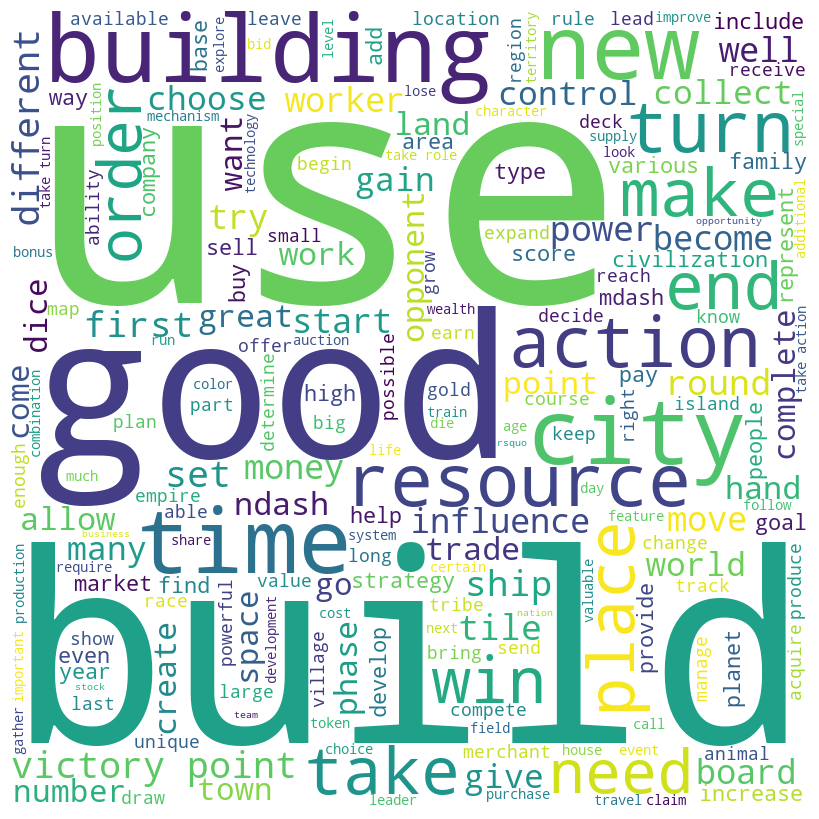

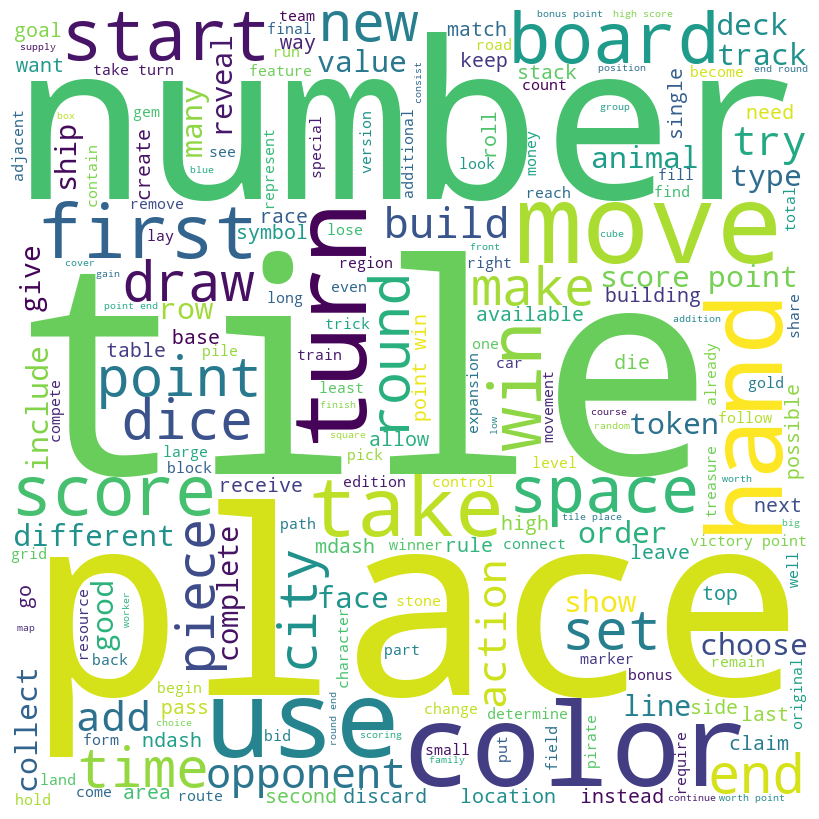

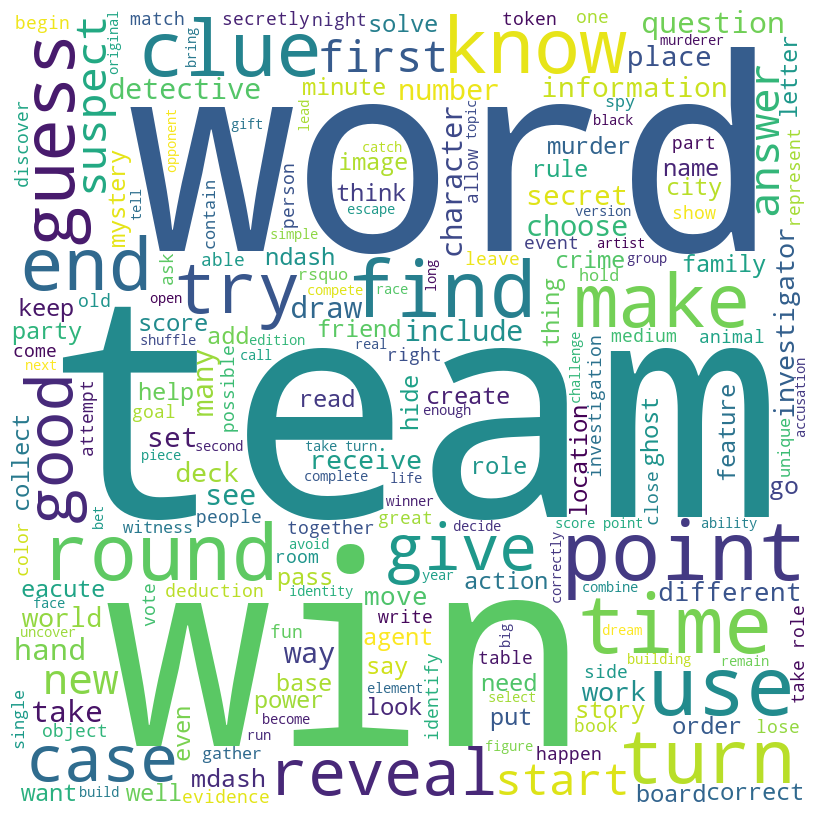

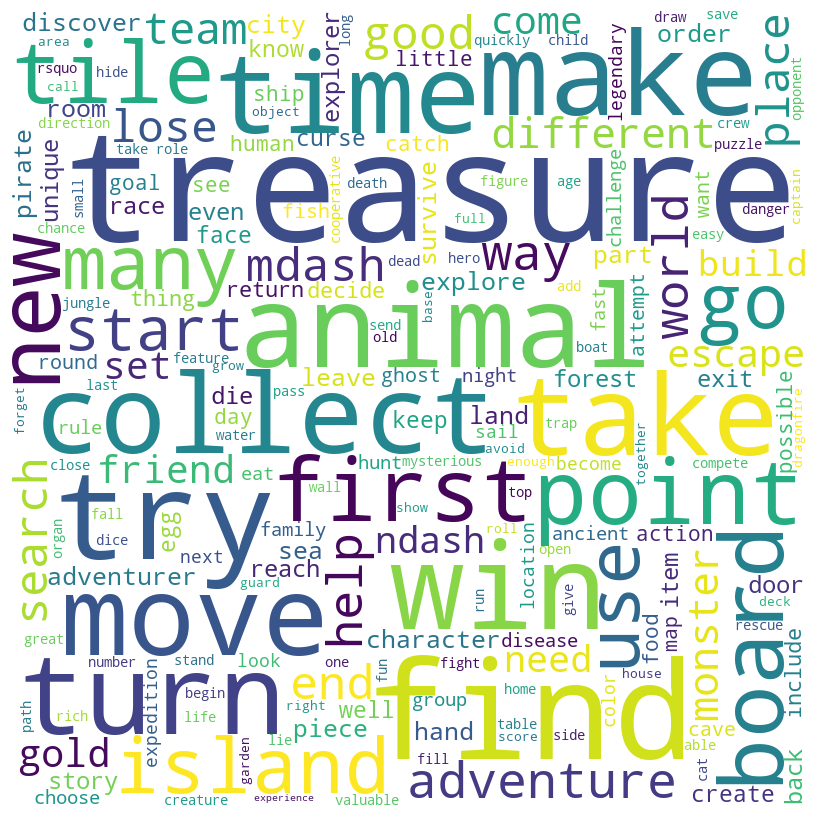

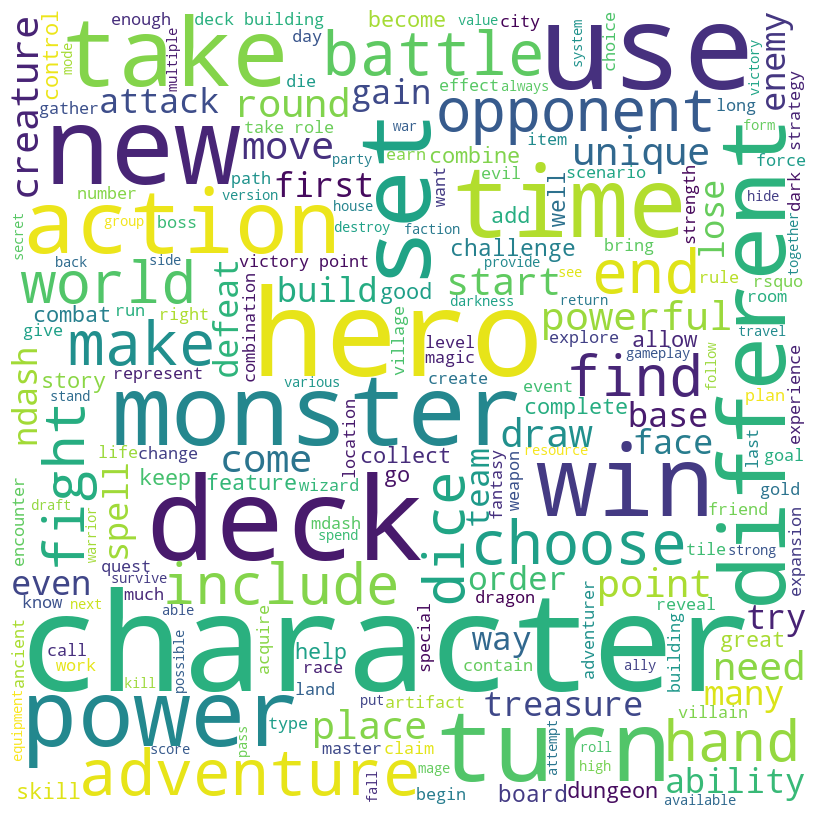

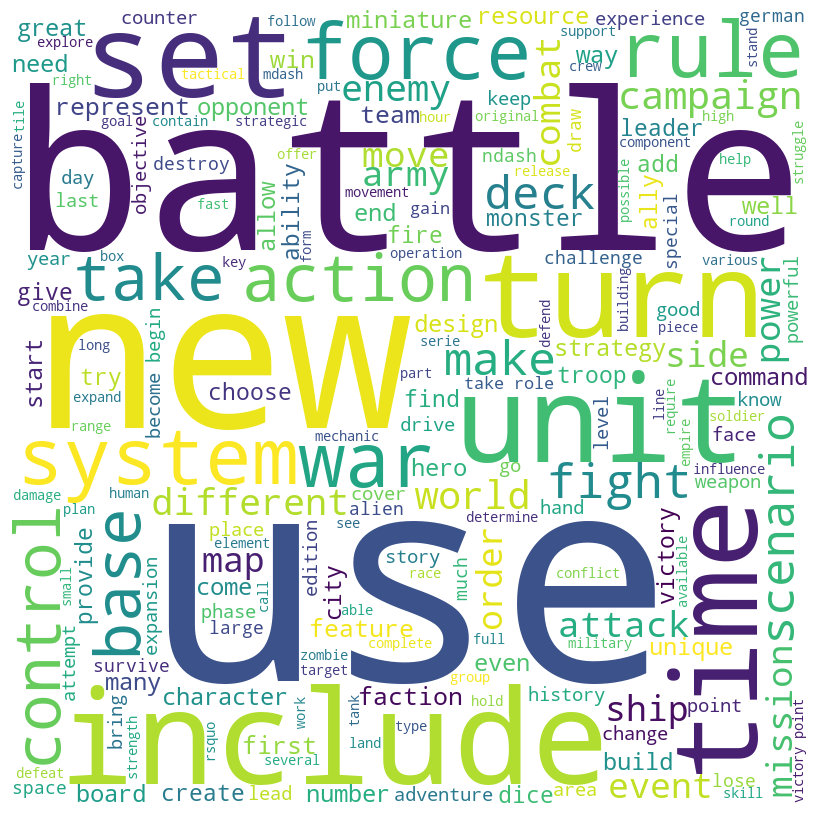

In [6]:
for i in range(6):
    plot_model(lda, plot = 'wordcloud', topic_num=f'Topic {i}')

In [7]:
# evaluate_model(lda)